In [29]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
import matplotlib.pyplot as plt
import cv2 as cv

[179 168 166]


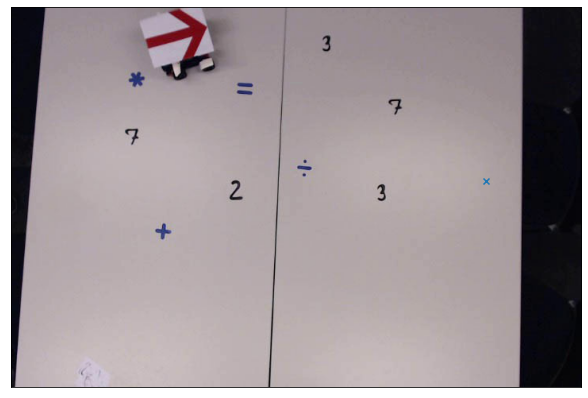

In [70]:
#img = data.astronaut()
img = imread('data/frame32.jpeg')

test_x = 600
test_y = 220
print(img[test_y, test_x, :])

fig, ax = plt.subplots(figsize=(15, 7))
ax.imshow(img)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])
ax.scatter(test_x, test_y, marker='x')
plt.show()

data/frame0.jpeg


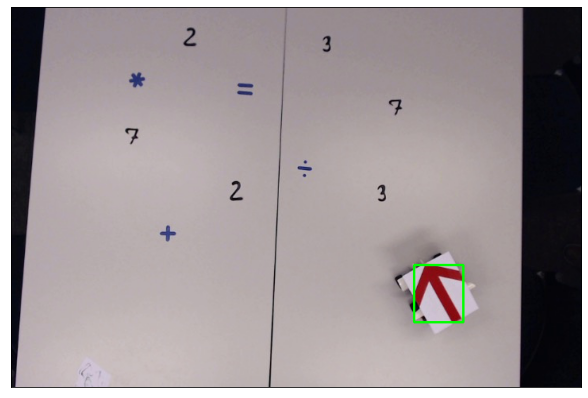

data/frame1.jpeg


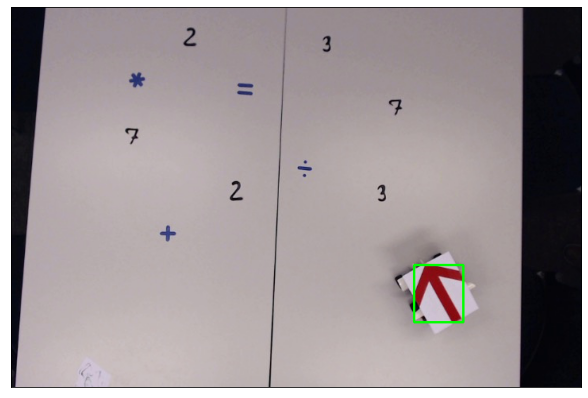

data/frame2.jpeg


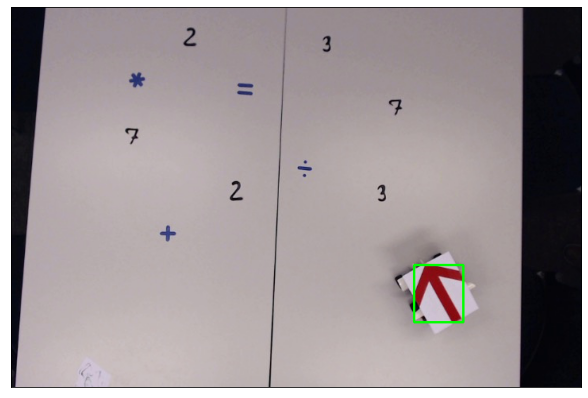

data/frame3.jpeg


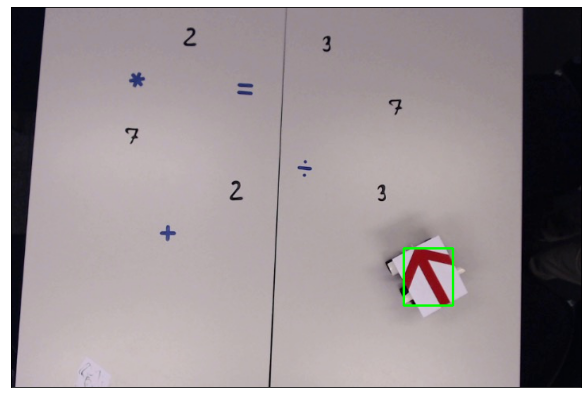

data/frame4.jpeg


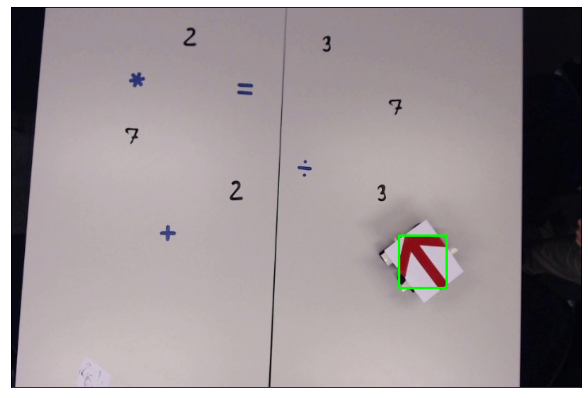

data/frame5.jpeg


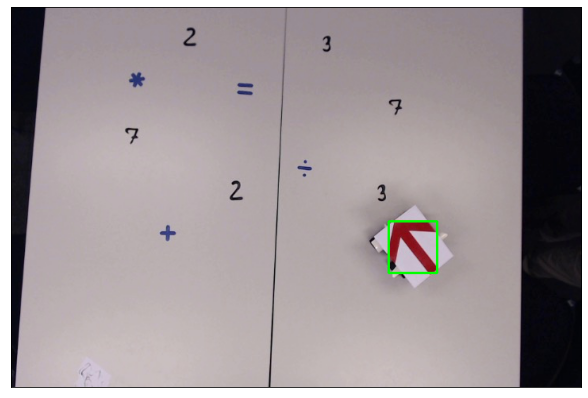

data/frame6.jpeg


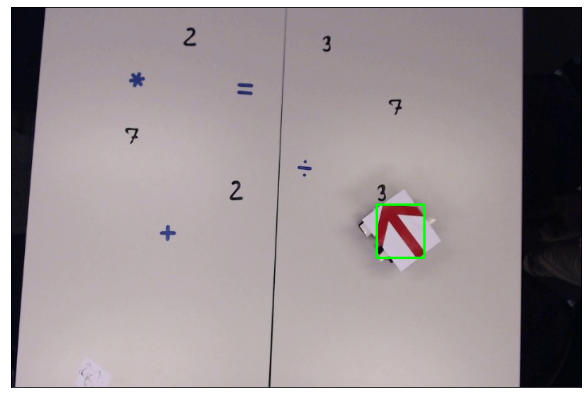

data/frame7.jpeg


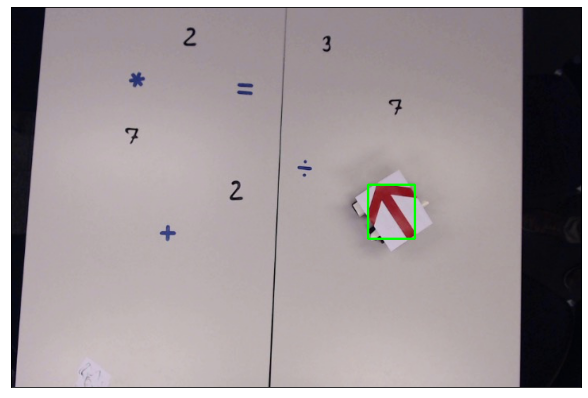

data/frame8.jpeg


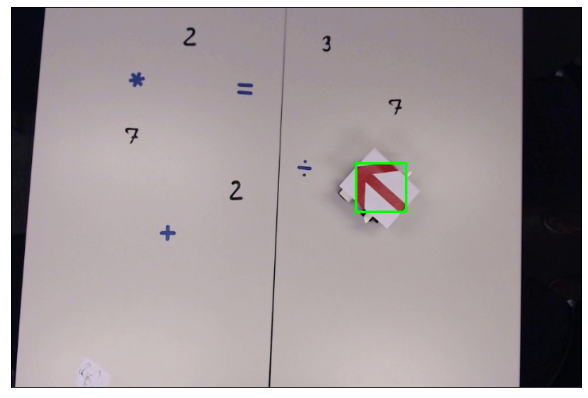

data/frame9.jpeg


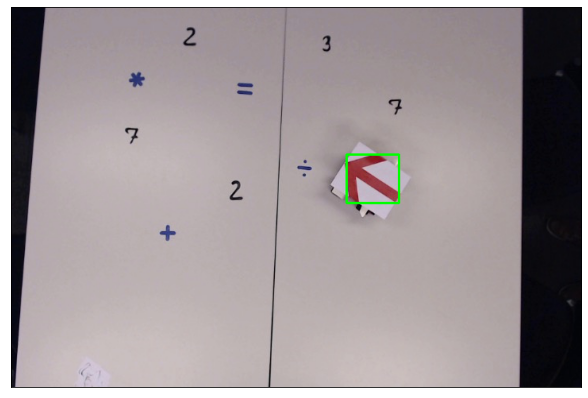

data/frame10.jpeg


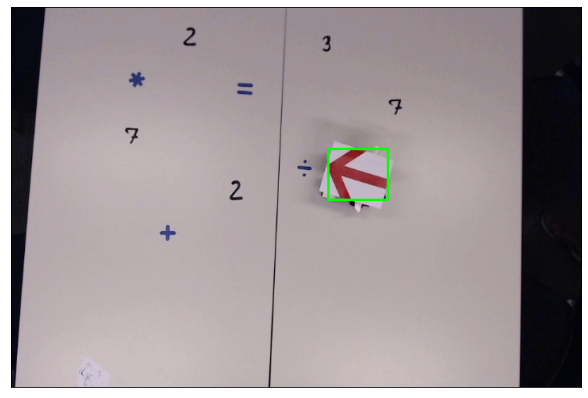

data/frame11.jpeg


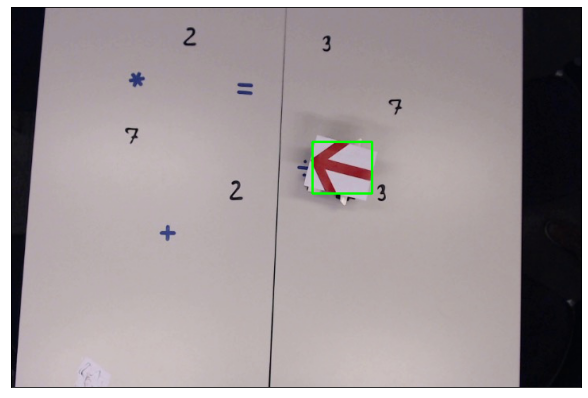

data/frame12.jpeg


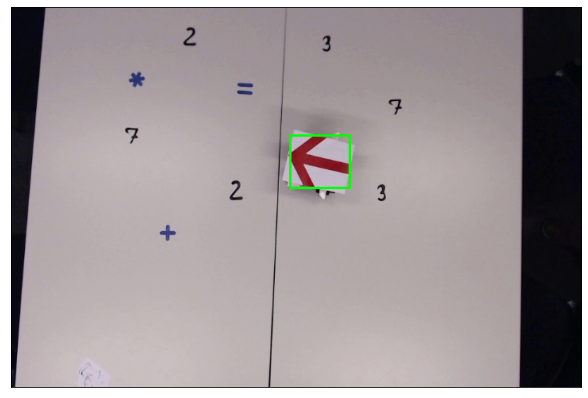

data/frame13.jpeg


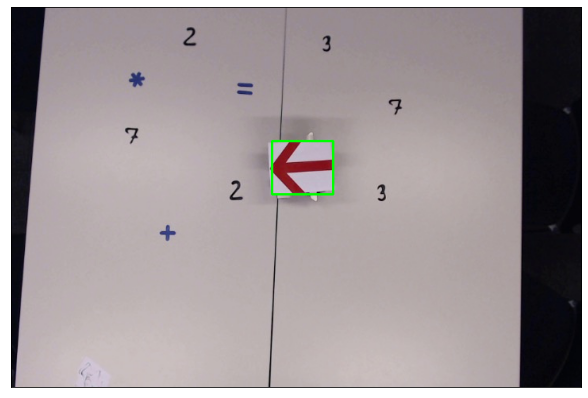

data/frame14.jpeg


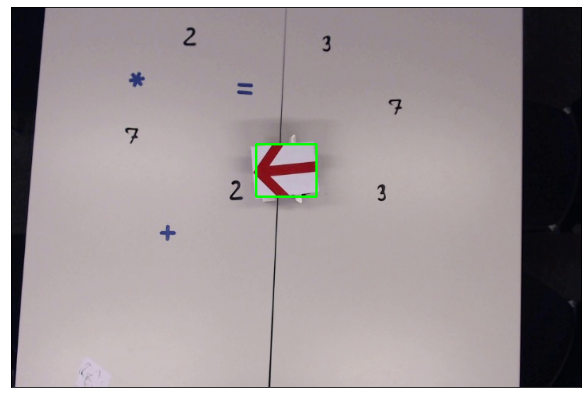

data/frame15.jpeg


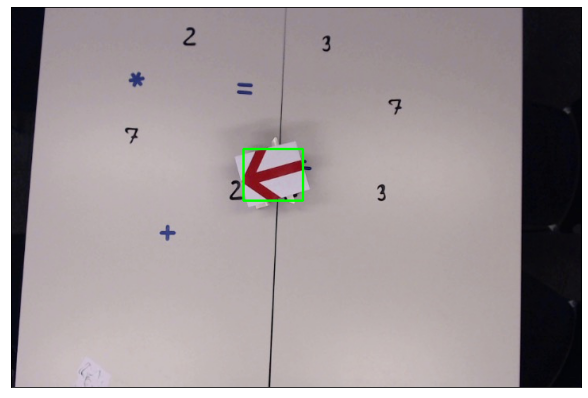

data/frame16.jpeg


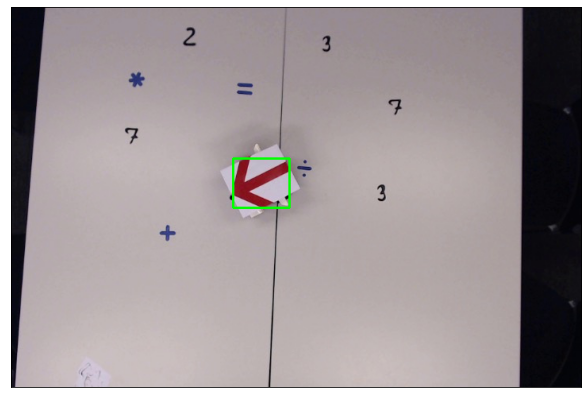

data/frame17.jpeg


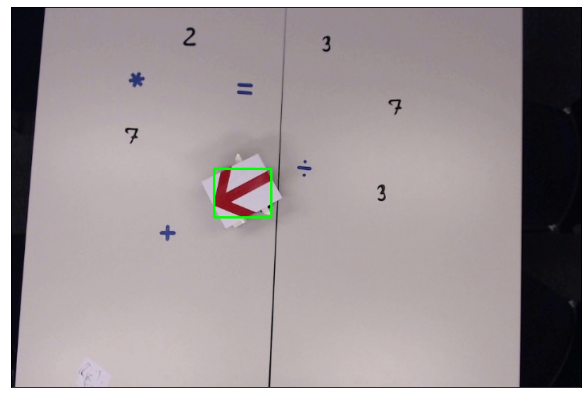

data/frame18.jpeg


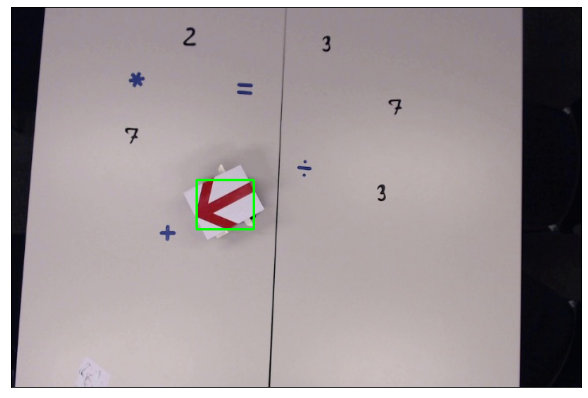

data/frame19.jpeg


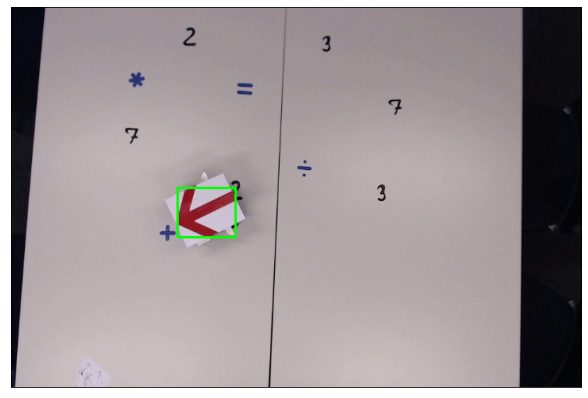

data/frame20.jpeg


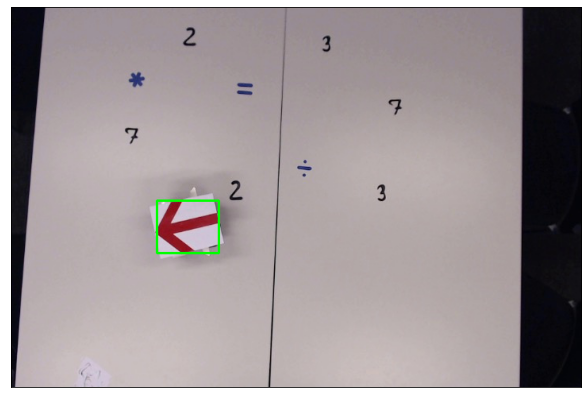

data/frame21.jpeg


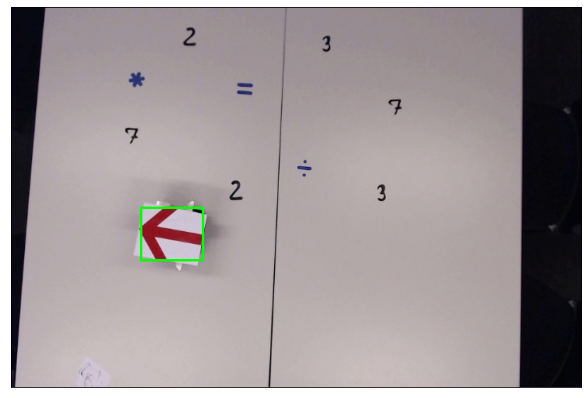

data/frame22.jpeg


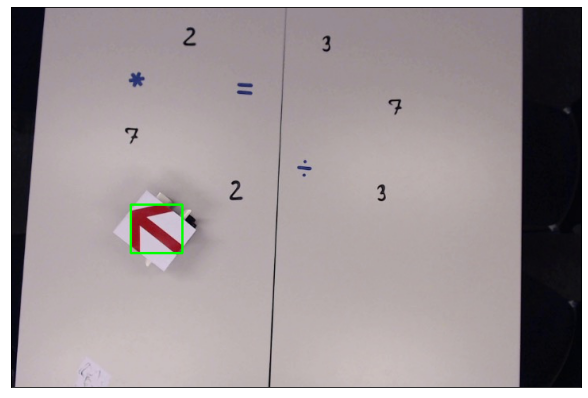

data/frame23.jpeg


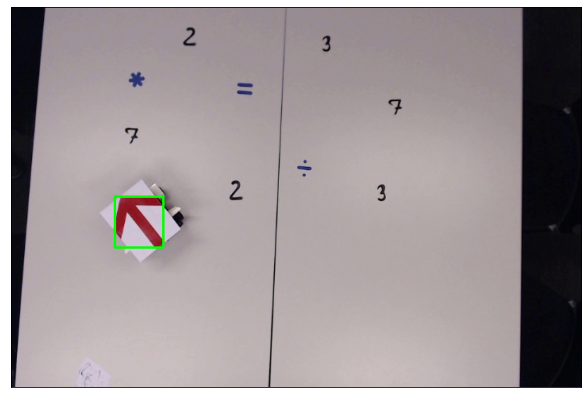

data/frame24.jpeg


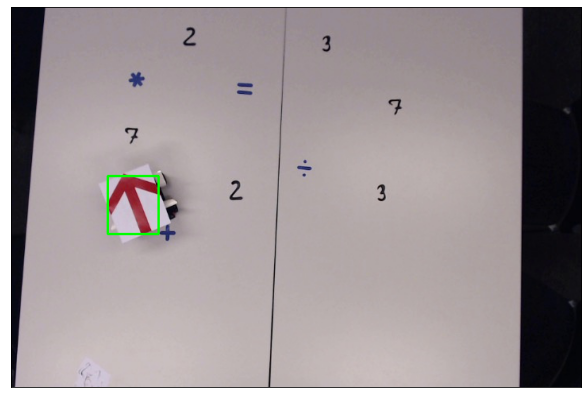

data/frame25.jpeg


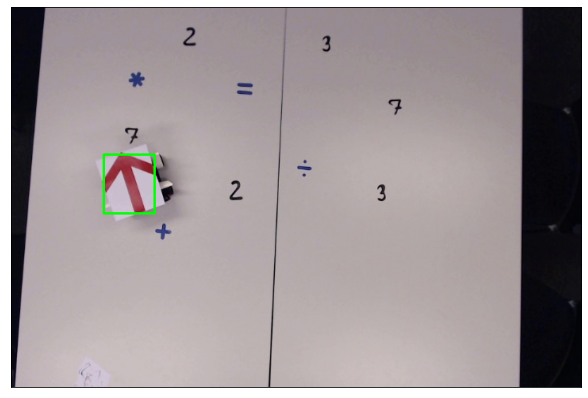

data/frame26.jpeg


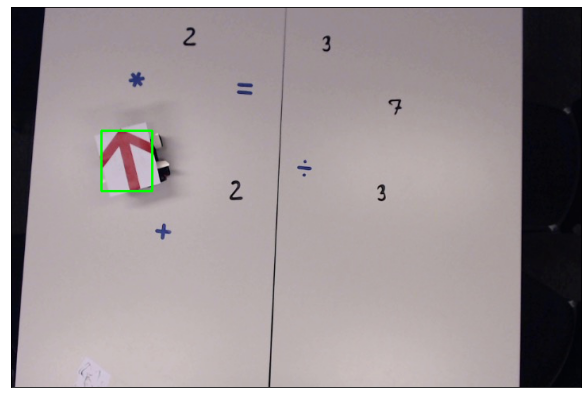

data/frame27.jpeg


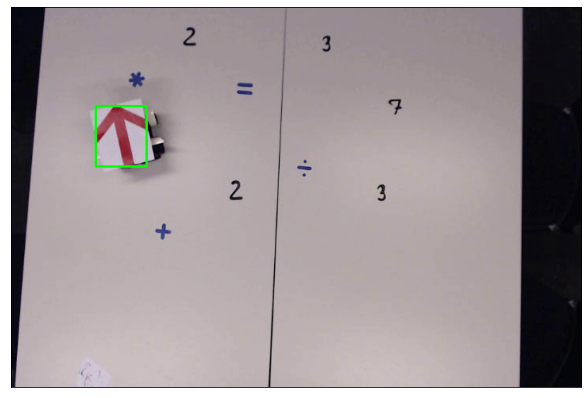

data/frame28.jpeg


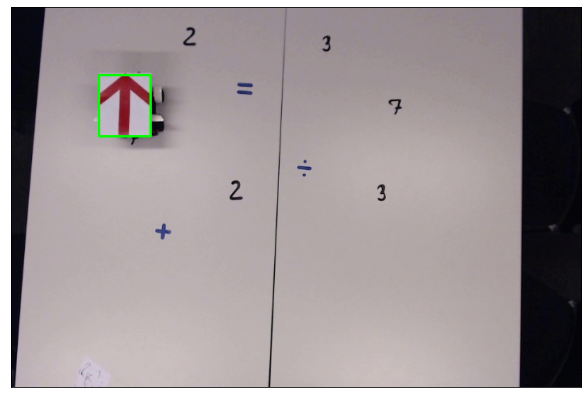

data/frame29.jpeg


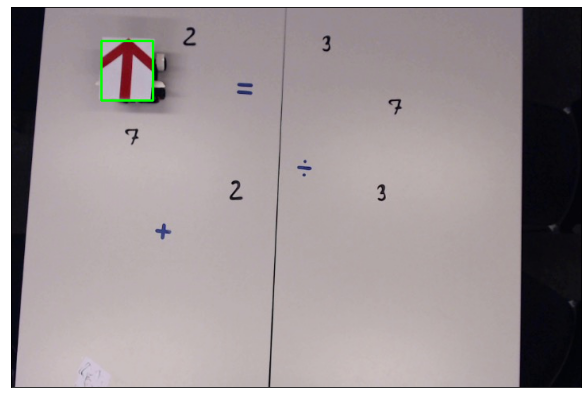

data/frame30.jpeg


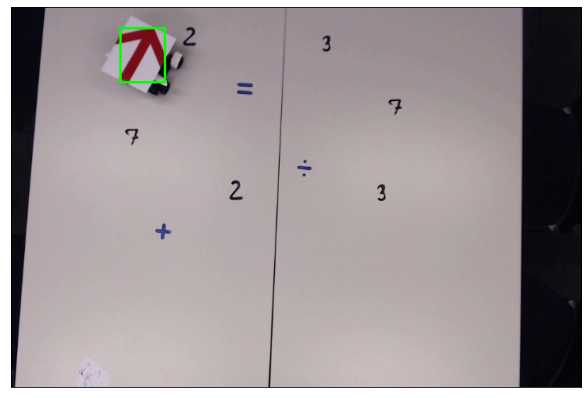

data/frame31.jpeg


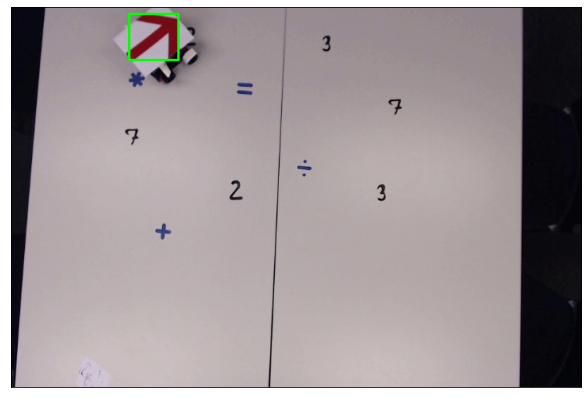

data/frame32.jpeg


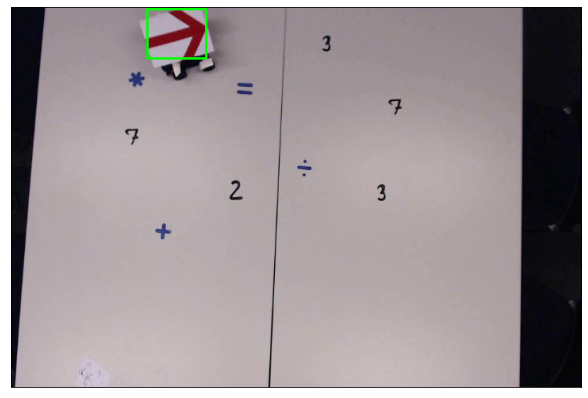

data/frame33.jpeg


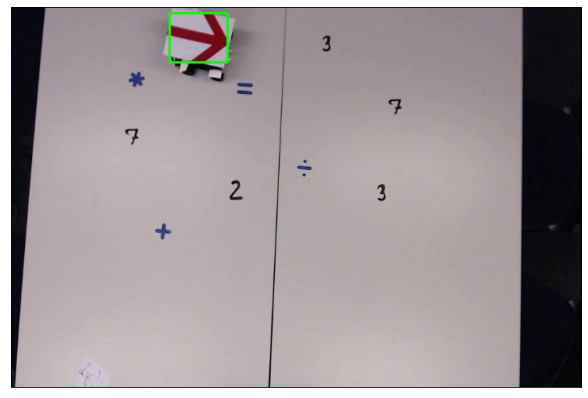

data/frame34.jpeg


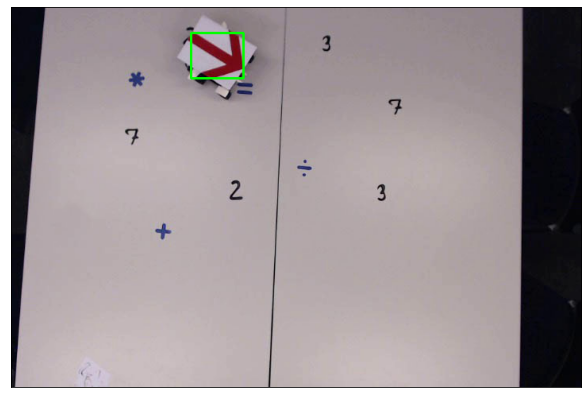

data/frame35.jpeg


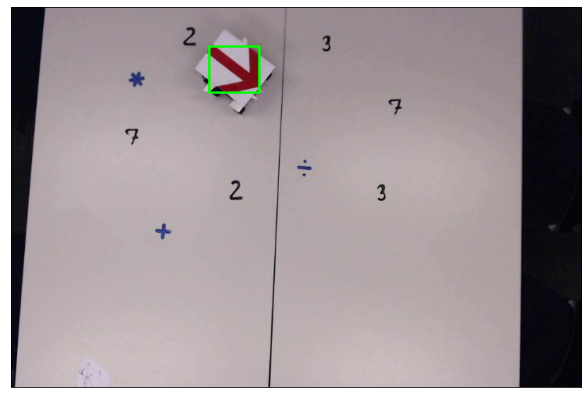

data/frame36.jpeg


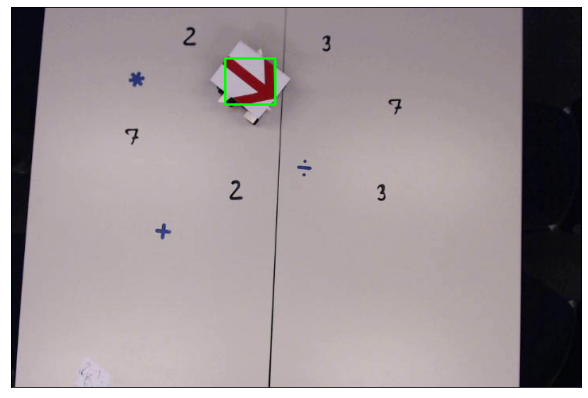

data/frame37.jpeg


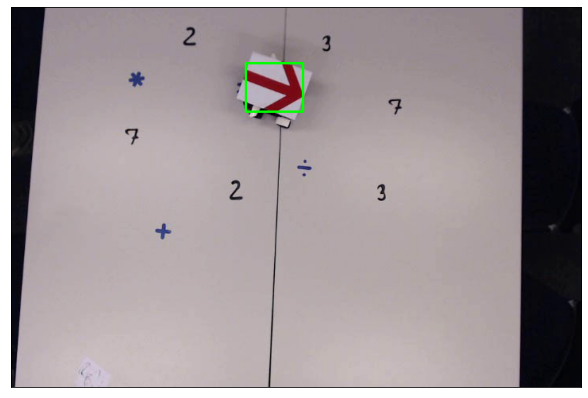

data/frame38.jpeg


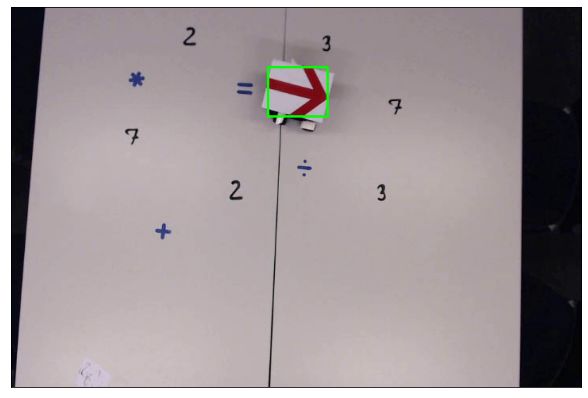

data/frame39.jpeg


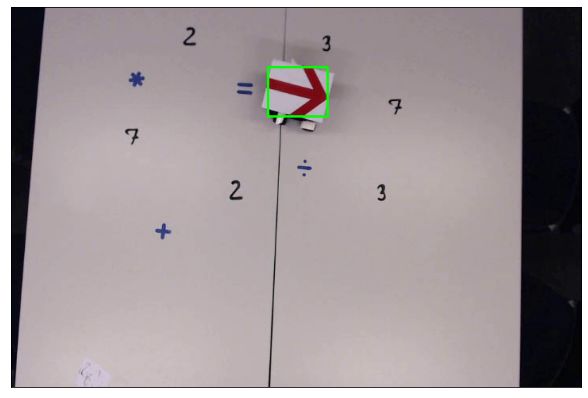

data/frame40.jpeg


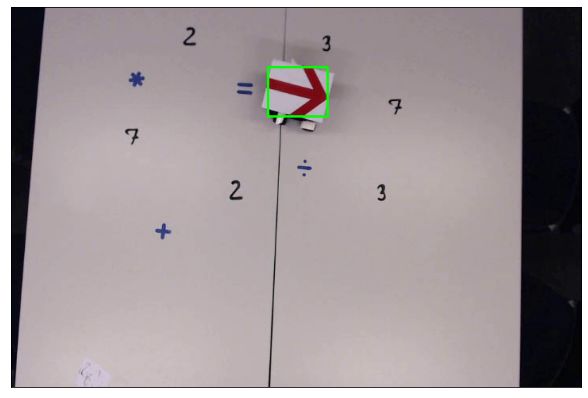

data/frame41.jpeg


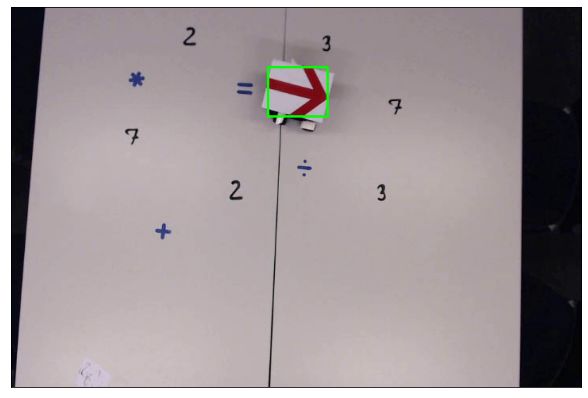

In [89]:
kernel = np.ones((5,5),np.uint8)

for i in range(42):
    filename = 'data/frame' + str(i) + '.jpeg'
    img = imread(filename)
    print(filename)
    
    reds = img[:, :, 0]
    blues = img[:, :, 1]
    greens = img[:, :, 2]

    mask = np.array((blues < 100) & (greens < 100) & (reds > 100), dtype=np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    
    process_im, contours, hierarchy = cv.findContours(mask,cv.RETR_LIST,cv.CHAIN_APPROX_SIMPLE)

    areas = [cv.contourArea(c) for c in contours]
    max_index = np.argmax(areas)
    contour = contours[max_index]

    x,y,w,h = cv.boundingRect(contour)
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.imshow(img)
    ax.set_xticks([]), ax.set_yticks([])
    ax.axis([0, img.shape[1], img.shape[0], 0])
    plt.show()